<a href="https://colab.research.google.com/github/VishalSingh2610/Machine-Learning-Projects/blob/main/Salary_Estimation_using_K_nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Salary Estimation using K-Nearest Neighbour**

Importing Libraries

In [31]:
import pandas as pd
import numpy as np

Choose Dataset from Local Directory

In [32]:
from google.colab import files
uploaded = files.upload()

Saving SalaryEstim.xlsx to SalaryEstim (1).xlsx


Load Dataset

In [33]:
dataset = pd.read_excel('SalaryEstim.xlsx')
print(dataset)

       age  education-num  capital-gain  hours-per-week  salary
0       39             13          2174              40   <=50K
1       50             13             0              13   <=50K
2       38              9             0              40   <=50K
3       53              7             0              40   <=50K
4       28             13             0              40   <=50K
...    ...            ...           ...             ...     ...
32556   27             12             0              38   <=50K
32557   40              9             0              40    >50K
32558   58              9             0              40   <=50K
32559   22              9             0              20   <=50K
32560   52              9         15024              40    >50K

[32561 rows x 5 columns]


Summarize the Dataset

In [34]:
print(dataset.shape)
print(dataset.head())
print(dataset.tail())


(32561, 5)
   age  education-num  capital-gain  hours-per-week  salary
0   39             13          2174              40   <=50K
1   50             13             0              13   <=50K
2   38              9             0              40   <=50K
3   53              7             0              40   <=50K
4   28             13             0              40   <=50K
       age  education-num  capital-gain  hours-per-week  salary
32556   27             12             0              38   <=50K
32557   40              9             0              40    >50K
32558   58              9             0              40   <=50K
32559   22              9             0              20   <=50K
32560   52              9         15024              40    >50K


Checking for Missing Values in our Dataset

In [35]:
print(dataset.isna().sum())
# print(dataset.isnull())

age               0
education-num     0
capital-gain      0
hours-per-week    0
salary            0
dtype: int64


check unique values in salary column for mapping

In [36]:
unique_values = dataset['salary'].unique()
print(unique_values)

[' <=50K' ' >50K']


Mapping Salary Data to Binary Value

In [37]:
income_Set = set(dataset['salary'])
dataset['salary'] = dataset['salary'].map({' <=50K': 0,' >50K': 1}).astype(int)
print(dataset.head())

   age  education-num  capital-gain  hours-per-week  salary
0   39             13          2174              40       0
1   50             13             0              13       0
2   38              9             0              40       0
3   53              7             0              40       0
4   28             13             0              40       0


Segregate Data input(independent variables) and output(dependent variabels)

In [40]:
X = dataset.iloc[:,:-1].values
X

array([[   39,    13,  2174,    40],
       [   50,    13,     0,    13],
       [   38,     9,     0,    40],
       ...,
       [   58,     9,     0,    40],
       [   22,     9,     0,    20],
       [   52,     9, 15024,    40]])

In [41]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 1])

**Train and Test data**

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)


Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 1.49894077 -0.80338299 -0.14576122 -0.44509689]
 [ 2.38045121  1.53114709 -0.14576122 -1.66848877]
 [ 0.2501343   1.53114709 -0.14576122 -0.03729959]
 ...
 [-1.14559057 -0.0252063  -0.14576122 -0.03729959]
 [ 0.47051192  2.30932378  0.89747778  0.3704977 ]
 [-0.99867216 -0.0252063   0.20664405  0.61517608]]


**Finding the best K-Value**

Text(0, 0.5, 'Mean error')

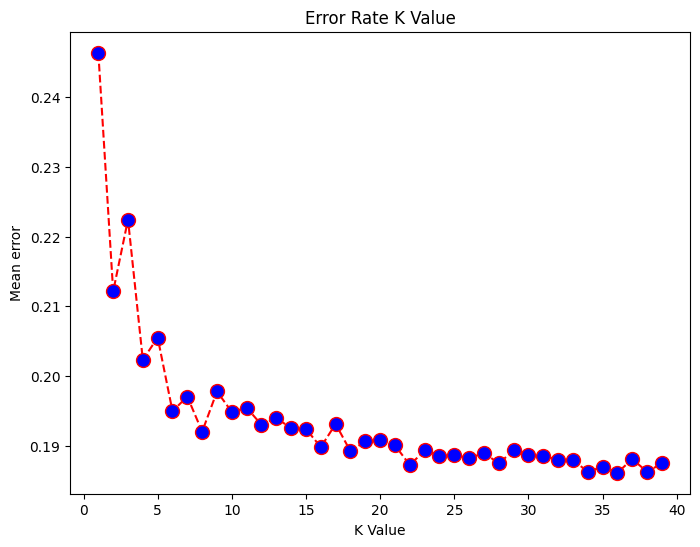

In [45]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt  #Data Visualization

#Calculating error for K values between 1 and 40

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(8,6))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='o',mfc='b',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')



Training

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30,metric = 'minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

**Predicting, whether new customer with Age & Salary will buy or not**

In [54]:
age = int(input("Enter new Employee's Age: "))
edu = int(input("Enter new Employee's Education: "))
cg = int(input("Enter new Employee's Capital Gain: "))
wh = int(input("Enter new Employee's Hour's per Week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result==1:
  print("Employee might got salary above 50K")
else:
  print("Employee might not got salary above 50K")

Enter new Employee's Age: 25
Enter new Employee's Education: 10
Enter new Employee's Capital Gain: 100
Enter new Employee's Hour's per Week: 25
[0]
Employee might not got salary above 50K


Prediction for all data

In [52]:
y_pred = model.predict(x_test)

**Accuracy **

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of Model: 81.13253900012283%
